In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

### 1. Introduction

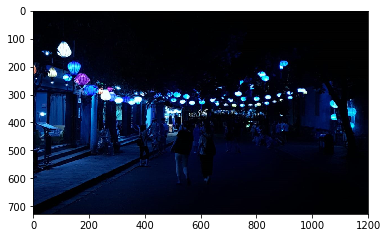

In [7]:
#Read in the image with the build in function from opencv
image = cv2.imread("hoi-ann.jpg")
#Display it with matplotlib
plt.imshow(image)

The images colors are off because opencv reads in the colors as Blue Green Red (BGR) instead of Red Green Blue (RGB).  
So in the next step we have to convert the colors:

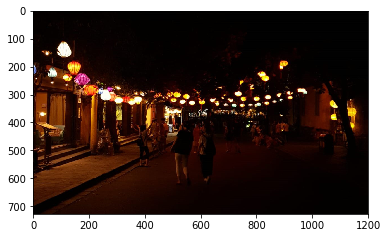

In [8]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [12]:
image.shape

(728, 1200, 3)

Shape[0] and shape[1] represent the spacial dimensions whereas shape[2] stands for the color dimensions.  
Spacial dimensions are measured in pixel. The three color dimensions are Red Green and Blue.
  
Next we need a function to convert the rgb colors to hex:

### 2. Color Conversion from RGB to HEX

In [26]:
def rgb2hex(color):
    return '#{:02x}{:02x}{:02x}'.format(int(color[0]), int(color[1]), int(color[2]))

<b>":02"</b> tells the format function to take atleast 2 digits and fill lacking digits with zeroes.  
<b>"x"</b> converts an integer into a lowercase hex format.
  
The Output for an rgb color hence is as follows:  

In [29]:
rgb2hex([0,160,250])

'#00a0fa'

### 3. Loading the image
The following functionn simply combines the loading and conversion functions we used earlyer:

In [16]:
def get_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

### 4. Color detection
Now we have to detect the colors.  
Our function takes two arguments, the image and the number of colors we want to detect.  
It displays a pie chart with the colors it has found and returns their rgb values.

In [30]:
def detect_colors(img, n_colors):
    #Resize the image to decrease the amount of pixels and computational work
    mod_img = cv2.resize(img,(364, 600), interpolation = cv2.INTER_AREA)
    #Reshape the image to 2 dimensions (spacial and color) to fit the parameters of the KMeans classifier
    mod_img = mod_img.reshape(mod_img.shape[0]*mod_img.shape[1], 3)
    
    #Define number of clusters equal to given number of colors
    clf = KMeans(n_clusters = n_colors)
    #Get the color clusters in accordance to the number of defined clusters
    labels = clf.fit_predict(mod_img)
    
    #Get the count of labels
    counts = Counter(labels)
    #And the center color of each cluster
    center_colors = clf.cluster_centers_
    
    #Combine the colors in a list
    ordered_colors = [center_colors[i] for i in counts.keys()]
    #Convert the colors to hex and rgb
    hex_colors = [rgb2hex(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    #Show pie chart with colors:
    plt.figure(figsize = (8,6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

### 5. Result

The resulting piechart displays the most prominent colors found:

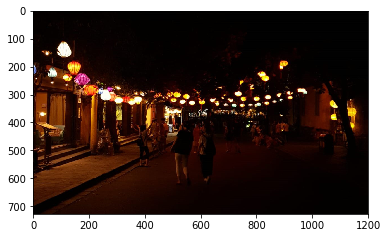

In [33]:
hoi_ann = get_img("hoi-ann.jpg")
plt.imshow(hoi_ann)

[array([7.35751465, 1.20684872, 0.65933124]),
 array([142.53227315,  70.45498129,  27.85278297]),
 array([239.93586338, 233.35635674, 205.44136622]),
 array([39.48167476,  8.12052951,  2.63679958]),
 array([87.68714278, 31.70552495,  8.73626487]),
 array([224.24390844, 166.95052917,  61.1786857 ])]

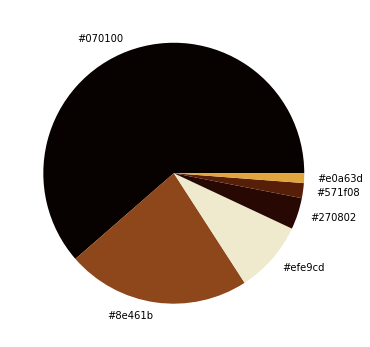

In [27]:
detect_colors(get_img("hoi-ann.jpg"), 6)

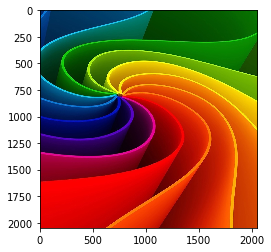

In [34]:
rainbow = get_img("rainbow.jpg")
plt.imshow(rainbow)

[array([198.07364384,  21.30529643,   8.25653212]),
 array([ 27.53643092, 113.73484578,   2.81976391]),
 array([230.94491456, 150.44545784,   7.18655955]),
 array([14.51085038, 43.59372242, 88.2947854 ])]

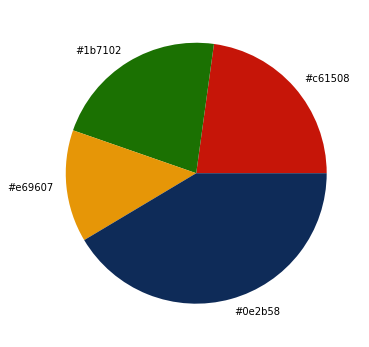

In [28]:
detect_colors(get_img("rainbow.jpg"), 4)